In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

os.chdir('data')
sns.set_style('whitegrid')

In [2]:
# Load the RNA-seq differentially expressed genes data
datPD = pd.read_table('parkinsonDE.txt')

# Slice the data by the adjusted p-value
lowPVal = datPD[datPD['padj'] < 0.05]

# Load the MS3 Proteomics data
protDatPD = pd.read_table('protPDE.csv')

# Slice the data by the FDR q-value
lowQVal = protDatPD[protDatPD['qvalue'] < 0.05]

In [3]:
# Read the up regulated genes in the Alzheimer's disease
alzUpGenes = []
with open('alzUpGenes.txt', 'r') as file:
    for gene in file:
        gene = gene.strip().upper()
        alzUpGenes.append(gene)

intersectAlzRNASeq = list(set(lowPVal['symbol']).intersection(alzUpGenes))
intersectTab = lowPVal[lowPVal['symbol'].isin(intersectAlzRNASeq)]
downRegGenes = intersectTab[intersectTab['log2FoldChange'] < 0].sort_values(by='log2FoldChange', ascending=True)

In [11]:
# Read the down regulated genes in the Alzheimer's disease
alzDnGenes = []
with open('alzDnGenes.txt', 'r') as file:
    for gene in file:
        gene = gene.strip().upper()
        alzDnGenes.append(gene)
alzDnGenes = alzDnGenes[2:]

In [25]:
# Find the intersection between the Proteomics proteins and the upregulated genes in the Alzheimer's disease
intersectAlzUpProt = list(set(lowQVal['Symbol']).intersection(alzUpGenes))
intersectTabUpProt = lowQVal[lowQVal['Symbol'].isin(intersectAlzUpProt)]

intersectTabUpProt[intersectTabUpProt['log2FoldChange'] > 0].sort_values(by='log2FoldChange', ascending=False)

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
135,AQP1,0.382980,1.304033,1.424316e-03,0.037185,0.023895
165,CA1,0.308048,1.238031,2.296287e-03,0.049218,0.031627
2,DPYSL3,0.221558,1.165992,1.570000e-07,0.000187,0.000120
37,NT5C,0.195499,1.145120,7.490000e-05,0.007015,0.004508
7,MAPK1,0.185216,1.136987,6.180000e-07,0.000275,0.000177
11,NEK7,0.132257,1.096007,3.560000e-06,0.001055,0.000678
57,ARHGAP1,0.120384,1.087024,2.130634e-04,0.012857,0.008262
107,GPC4,0.119807,1.086589,9.654721e-04,0.031480,0.020229
266,GPM6B,0.117889,1.085146,5.437979e-03,0.072466,0.046566
157,KPNB1,0.115725,1.083519,2.044361e-03,0.046037,0.029583


In [19]:
# List the proteins that are downregulated instead of upregulated like they are in Alzheimer's Disease
intersectTabUpProt[intersectTabUpProt['log2FoldChange'] < 0].sort_values(by='log2FoldChange', ascending=False)

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
152,ERP44,-0.065121,0.955865,1.898488e-03,0.044149,0.028370
150,PURA,-0.070011,0.952630,1.878987e-03,0.044149,0.028370
64,GMPS,-0.079542,0.946358,2.718705e-04,0.014882,0.009563
158,LONP1,-0.083056,0.944056,2.068578e-03,0.046289,0.029745
172,RPLP2,-0.138222,0.908638,2.533740e-03,0.051860,0.033325
121,GAB2,-0.140629,0.907124,1.233482e-03,0.035690,0.022934
252,EML2,-0.151655,0.900217,5.034572e-03,0.070252,0.045144
6,DAZAP1,-0.161622,0.894019,5.170000e-07,0.000263,0.000169
70,CAST,-0.173852,0.886473,3.368597e-04,0.016881,0.010848
148,GJB1,-0.179560,0.882972,1.841259e-03,0.043968,0.028253


In [44]:
# Find the intersection between the Proteomics proteins and the upregulated genes in the Alzheimer's disease
intersectAlzUpRNA = list(set(lowPVal['symbol']).intersection(alzUpGenes))
intersectTabUpRNA = lowPVal[lowPVal['symbol'].isin(intersectAlzUpRNA)]

intersectTabUpRNA[intersectTabUpRNA['log2FoldChange'] > 0].ix[:, 1:].sort_values(by='log2FoldChange',
                                                                                 ascending=False).head()

,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
45,S100A12,18.352878,1.095097,0.235501,4.650076,3.318127e-06,0.001242
127,SLC1A7,138.256682,0.976435,0.234148,4.170166,3.043779e-05,0.004164
31,MAFF,498.794465,0.957856,0.194620,4.921670,8.580863e-07,0.000471
65,GPR4,286.632707,0.935271,0.207966,4.497225,6.884627e-06,0.001834
66,ITGA10,334.582400,0.773580,0.172182,4.492805,7.029114e-06,0.001844


In [49]:
intersectTabUpRNA[intersectTabUpRNA['log2FoldChange'] < 0].ix[:, 1:].sort_values(by='log2FoldChange',
                                                                                 ascending=True)

,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
74,DAO,38.020726,-1.049665,0.238808,-4.395434,0.000011,0.002492
548,SPAG6,97.753997,-0.731278,0.216813,-3.372848,0.000744,0.023749
277,ANGPTL2,390.863474,-0.706149,0.189659,-3.723258,0.000197,0.012437
325,ENOSF1,725.096904,-0.693534,0.189811,-3.653802,0.000258,0.013939
1016,PZP,25.175855,-0.648868,0.217105,-2.988727,0.002801,0.048426
169,PLAG1,136.268581,-0.528449,0.131566,-4.016619,0.000059,0.006139
611,RBM3,1564.087820,-0.497115,0.149865,-3.317088,0.000910,0.026129
108,ZNF136,213.475884,-0.483048,0.113624,-4.251268,0.000021,0.003416
353,ALMS1,372.994365,-0.468491,0.129729,-3.611315,0.000305,0.015129
939,TUBA1A,20528.239091,-0.412856,0.136051,-3.034566,0.002409,0.045084


In [50]:
intAlzUpRNAFalse = sum(intersectTabUpRNA['log2FoldChange'] < 0)

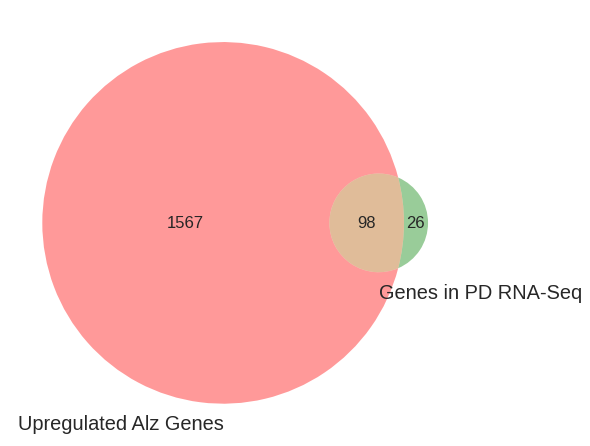

In [53]:
# Generate the venn diagram for the upregulated genes in Alz's disease and genes in PD RNA-Seq
intAlzUpRNA = [len(alzUpGenes)-len(intersectAlzUpRNA), intAlzUpRNAFalse, len(intersectAlzUpRNA)-intAlzUpRNAFalse]
intAlzUpRNAPDVenn = venn2(intAlzUpRNA, ['Upregulated Alz Genes',
                                          'Genes in PD RNA-Seq'])

In [26]:
intAlzUpProtFalse = sum(intersectTabUpProt['foldChange'] < 1)

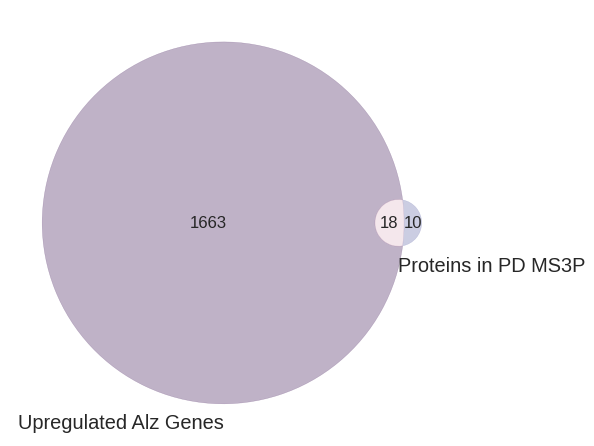

In [52]:
# Generate the venn diagram for the upregulated genes in Alz's disease and proteins in PD MS3P
intAlzUpProt = [len(alzUpGenes)-len(intersectAlzUpProt), intAlzUpProtFalse, len(intersectAlzUpProt)-intAlzUpProtFalse]
intAlzUpProtPDVenn = venn2(intAlzUpProt, ['Upregulated Alz Genes',
                                          'Proteins in PD MS3P'])
intAlzUpProtPDVenn.get_patch_by_id('10').set_color('#613F75')
intAlzUpProtPDVenn.get_patch_by_id('01').set_color('#7D82B8')
intAlzUpProtPDVenn.get_patch_by_id('11').set_color('#E5C3D1')

In [20]:
# Find the intersection between the Proteomics proteins and the upregulated genes in the Alzheimer's disease
intersectAlzDnProt = list(set(lowQVal['Symbol']).intersection(alzDnGenes))
intersectTabDnProt = lowQVal[lowQVal['Symbol'].isin(intersectAlzDnProt)]
intersectTabDnProt[intersectTabDnProt['log2FoldChange'] < 0].sort_values(by='log2FoldChange', ascending=False)

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
225,DLD,-0.063471,0.956959,4.106793e-03,0.064655,0.041547
257,OPA1,-0.068977,0.953314,5.109362e-03,0.070252,0.045144
216,CS,-0.075342,0.949117,3.803462e-03,0.062363,0.040074
54,VDAC1,-0.078594,0.946980,1.701323e-04,0.011006,0.007072
269,MICU1,-0.079595,0.946323,5.594906e-03,0.073728,0.047377
169,NNT,-0.082885,0.944167,2.412585e-03,0.049941,0.032092
224,NDUFB11,-0.083626,0.943683,4.040400e-03,0.063892,0.041057
59,CNTNAP2,-0.085431,0.942503,2.169302e-04,0.012864,0.008266
186,NDUFV2,-0.086275,0.941951,2.907925e-03,0.054914,0.035288
166,COX7A2L,-0.086373,0.941888,2.328876e-03,0.049495,0.031805


In [21]:
# List the proteins that are upregulated instead of downregulated like they are in Alzheimer's Disease
intersectTabDnProt[intersectTabDnProt['log2FoldChange'] > 0].sort_values(by='log2FoldChange', ascending=False)

,Symbol,log2FoldChange,foldChange,pvalue,padj,qvalue
43,SCN3B,0.218901,1.163847,1.033580e-04,0.008358,0.005371
7,MAPK1,0.185216,1.136987,6.180000e-07,0.000275,0.000177
272,SYN1,0.149011,1.108809,5.729241e-03,0.074669,0.047982
190,GRIA1,0.140143,1.102014,2.967760e-03,0.055060,0.035381
157,KPNB1,0.115725,1.083519,2.044361e-03,0.046037,0.029583
245,FHL1,0.112306,1.080955,4.825130e-03,0.069525,0.044677
119,GLUD1,0.107536,1.077386,1.149074e-03,0.034070,0.021893
97,ACTR3,0.099772,1.071604,8.243150e-04,0.029928,0.019231
24,YWHAZ,0.098871,1.070935,3.670000e-05,0.005180,0.003329
27,ESD,0.093348,1.066843,4.570000e-05,0.005805,0.003730


In [32]:
intAlzDnProtFalse = sum(intersectTabDnProt['log2FoldChange'] > 0)

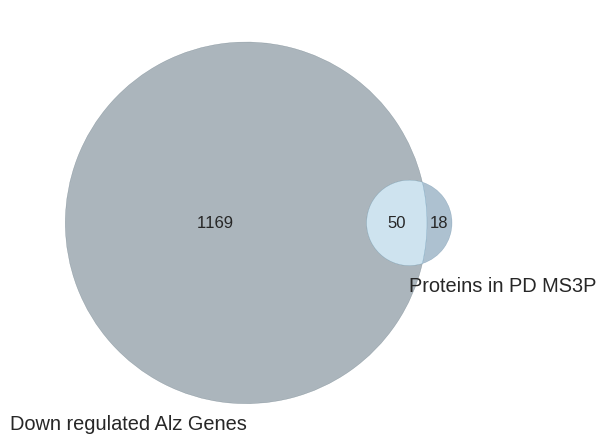

In [55]:
# Generate the venn diagram for the downregulated genes in Alz's disease and proteins in PD MS3P
intAlzDnProt = [len(alzDnGenes)-len(intersectAlzDnProt), intAlzDnProtFalse,
                len(intersectAlzDnProt)-intAlzDnProtFalse]
intAlzDnProtPDVenn = venn2(intAlzDnProt, ['Down regulated Alz Genes',
                                          'Proteins in PD MS3P'])

intAlzDnProtPDVenn.get_patch_by_id('10').set_color('#2F4858')
intAlzDnProtPDVenn.get_patch_by_id('01').set_color('#33658A')
intAlzDnProtPDVenn.get_patch_by_id('11').set_color('#86BBD8')